### Задание 1
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from functools import reduce

In [165]:
# variant 1
recall = 10

for i in range(recall):
    click = input()
    field = round(np.random.uniform(0, 36))
    if field == 0:
        print('Поле Zero')
    elif field % 2 == 1:
        print('Красное поле')
    else:
        print('Черное поле')
        

Черное поле


Черное поле


Черное поле


Красное поле


Красное поле


Черное поле


Черное поле


Красное поле


Черное поле


Красное поле


In [166]:
# variant 2
recall = 10000
zero = red = black = 0

for i in range(recall):
    field = round(np.random.uniform(0, 36))
    if field == 0:
        zero += 1
    elif field % 2 == 1:
        red += 1
    else:
        black += 1

print(f'P(zero) = {zero / recall}, P(red) = {red / recall}, P(black) = {black / recall}')

P(zero) = 0.0153, P(red) = 0.4925, P(black) = 0.4922


### Задание 2
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

###### Для наглядности используем рулетку с позициями от 1 до 10, где черные будут четными, а красные - нечетными.
###### Докажем, что вероятность выпадения четного, а затем 9-ки будет $P(четн.) * P(9)$ т.е. около $0.5 * 0.1$

In [167]:
recall = 10000
red = black = nineaftblack = 0
chance = False  # если chance is True, это значит что первое событие состоялось, 
                # и теперь есть вероятность наступления второго, связанного с ним, события

for i in range(recall):
    field = round(np.random.uniform(1, 10))
    if chance is True:
        chance = False
        if field == 9:
            nineaftblack += 1       
    if field % 2 == 0:
        black += 1
        chance = True
    else:
        red += 1

print(f'P(red) = {red / recall}, P(black) = {black / recall}, P(nineaftblack) = {nineaftblack / recall}')

P(red) = 0.4968, P(black) = 0.5032, P(nineaftblack) = 0.0568


2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

[45.53941773 51.12888978 62.90177753 41.61506686 47.94118743 48.68186251
 52.13293145 52.79716141 52.70246157 27.57092576]


(array([1., 0., 0., 1., 0., 3., 2., 2., 0., 1.]),
 array([27.57092576, 31.10401094, 34.63709611, 38.17018129, 41.70326647,
        45.23635165, 48.76943682, 52.302522  , 55.83560718, 59.36869235,
        62.90177753]),
 <a list of 10 Patch objects>)

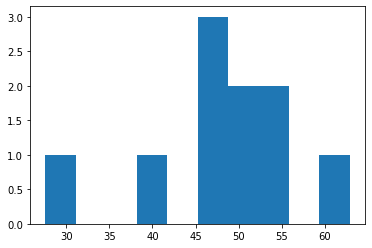

In [168]:
x = np.random.uniform(0, 10, (10, 10))
print(sum(x))
plt.hist(sum(x), bins=10)


### Задание 3
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [324]:
k, n = 0, 100
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(n):
    if x[i] == 1:
        k += 1
# print(a, b, c, d)
# print(x)
print(f'кол-во удач = {k}, кол-во испытаний = {n}, вероятность удачи {k / n}')

кол-во удач = 27, кол-во испытаний = 100, вероятность удачи 0.27


In [328]:
howmany1 = sum2 = allcomb = 0
for p in itertools.product('01' ,repeat=4):
    allcomb += 1
    print(''.join(p))
    for i in p:
        if i == '1':
            howmany1 += 1  
    if howmany1 == 2:
        sum2 += 1
    howmany1 = 0
    
print(f'\nВсего комбинаций = {allcomb}') 
print(f'Комбинаций, где поровну 0 и 1 = {sum2}')
print(f'Вероятность выпадения таких комбинаций = {sum2 / allcomb}')

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111

Всего комбинаций = 16
Комбинаций, где поровну 0 и 1 = 6
Вероятность выпадения таких комбинаций = 0.375


###### Вероятность $p = \frac{6}{16} = 0.375$ . 
###### Следовательно $q = 1 - p = 0.625$.
###### Согласно формуле Бернулли $P_n^k = C_n^k*p^k*q^{n-k} = \frac{n!}{k!*(n-k)!}*p^k*q^{n-k}$
###### Рассмотрим код для нашего случая:

In [325]:
n = 20  # кол-во испытаний
p = 0.375  # вероятность выпадания нужной комбинации


def factorial(n):
    return reduce((lambda x,y: x*y),range(1,n+1))


def P_n_k(p, n, k):
    C_n_k = factorial(n) / (factorial(k) * factorial(n - k))
    return C_n_k * p**k * (1 - p)**(n - k)


print(f'Кол-во испытаний = {n}, вероятность выпадания комбинации = {p}')
for k in range(1, n):
    print(f'\tВероятность {k} удач = {P_n_k(p, n, k)}')

Кол-во испытаний = 20, вероятность выпадания комбинации = 0.375
	Вероятность 1 удач = 0.0009926167350636332
	Вероятность 2 удач = 0.005657915389862709
	Вероятность 3 удач = 0.020368495403505753
	Вероятность 4 удач = 0.051939663278939674
	Вероятность 5 удач = 0.09972415349556417
	Вероятность 6 удач = 0.14958623024334625
	Вероятность 7 удач = 0.17950347629201552
	Вероятность 8 удач = 0.17501588938471513
	Вероятность 9 удач = 0.1400127115077721
	Вероятность 10 удач = 0.09240838959512958
	Вероятность 11 удач = 0.050404576142797954
	Вероятность 12 удач = 0.022682059264259077
	Вероятность 13 удач = 0.008374914189880275
	Вероятность 14 удач = 0.0025124742569640826
	Вероятность 15 удач = 0.0006029938216713798
	Вероятность 16 удач = 0.00011306134156338372
	Вероятность 17 удач = 1.5961601161889466e-05
	Вероятность 18 удач = 1.5961601161889466e-06
	Вероятность 19 удач = 1.0081011260140715e-07


Елси это не то, что нужно было получить, значит задача мною была неправильно понята(

##### 2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов 
##### в последовательности из n независимых испытаний, взяв другие значения n и k.

Уже решено в предыдущем пункте) 

### Задание 4
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [341]:
def factorial(n):
    return reduce((lambda x,y: x*y),range(1,n+1))


cnt, n = 0, 5
# перестановка
for i in itertools.permutations('ABCDE', n):
    print(i)
    cnt += 1

print(f'Всего комбинаций = {cnt}')
assert factorial(n) == cnt, 'формула перестановки неверна!'

('A', 'B', 'C', 'D', 'E')
('A', 'B', 'C', 'E', 'D')
('A', 'B', 'D', 'C', 'E')
('A', 'B', 'D', 'E', 'C')
('A', 'B', 'E', 'C', 'D')
('A', 'B', 'E', 'D', 'C')
('A', 'C', 'B', 'D', 'E')
('A', 'C', 'B', 'E', 'D')
('A', 'C', 'D', 'B', 'E')
('A', 'C', 'D', 'E', 'B')
('A', 'C', 'E', 'B', 'D')
('A', 'C', 'E', 'D', 'B')
('A', 'D', 'B', 'C', 'E')
('A', 'D', 'B', 'E', 'C')
('A', 'D', 'C', 'B', 'E')
('A', 'D', 'C', 'E', 'B')
('A', 'D', 'E', 'B', 'C')
('A', 'D', 'E', 'C', 'B')
('A', 'E', 'B', 'C', 'D')
('A', 'E', 'B', 'D', 'C')
('A', 'E', 'C', 'B', 'D')
('A', 'E', 'C', 'D', 'B')
('A', 'E', 'D', 'B', 'C')
('A', 'E', 'D', 'C', 'B')
('B', 'A', 'C', 'D', 'E')
('B', 'A', 'C', 'E', 'D')
('B', 'A', 'D', 'C', 'E')
('B', 'A', 'D', 'E', 'C')
('B', 'A', 'E', 'C', 'D')
('B', 'A', 'E', 'D', 'C')
('B', 'C', 'A', 'D', 'E')
('B', 'C', 'A', 'E', 'D')
('B', 'C', 'D', 'A', 'E')
('B', 'C', 'D', 'E', 'A')
('B', 'C', 'E', 'A', 'D')
('B', 'C', 'E', 'D', 'A')
('B', 'D', 'A', 'C', 'E')
('B', 'D', 'A', 'E', 'C')
('B', 'D', '

In [352]:
def factorial(n):
    return reduce((lambda x,y: x*y),range(1,n+1))


cnt, n, k = 0, 5, 3
# размещение
for i in itertools.permutations('ABCDE', k):
    print(i)
    cnt += 1
    
print(f'Всего комбинаций = {cnt}')
assert factorial(n) / factorial(n - k) == cnt, 'формула размещения неверна!'

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'C', 'E')
('A', 'D', 'B')
('A', 'D', 'C')
('A', 'D', 'E')
('A', 'E', 'B')
('A', 'E', 'C')
('A', 'E', 'D')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'A', 'E')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'C', 'E')
('B', 'D', 'A')
('B', 'D', 'C')
('B', 'D', 'E')
('B', 'E', 'A')
('B', 'E', 'C')
('B', 'E', 'D')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'A', 'E')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'B', 'E')
('C', 'D', 'A')
('C', 'D', 'B')
('C', 'D', 'E')
('C', 'E', 'A')
('C', 'E', 'B')
('C', 'E', 'D')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'A', 'E')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'B', 'E')
('D', 'C', 'A')
('D', 'C', 'B')
('D', 'C', 'E')
('D', 'E', 'A')
('D', 'E', 'B')
('D', 'E', 'C')
('E', 'A', 'B')
('E', 'A', 'C')
('E', 'A', 'D')
('E', 'B', 'A')
('E', 'B', 'C')
('E', 'B', 'D')
('E', 'C', 'A')
('E', 'C', 'B')
('E', 'C', 'D')
('E', 'D', 'A')
('E', 'D', 'B')
('E', 'D', 'C')
Всего комбинаций = 60


In [351]:
def factorial(n):
    return reduce((lambda x,y: x*y),range(1,n+1))


cnt, n, k = 0, 5, 3
# сочетание
for i in itertools.combinations('ABCDE', k):
    print(i)
    cnt += 1
    
print(f'Всего комбинаций = {cnt}')
assert factorial(n) / (factorial(k) * factorial(n - k)) == cnt, 'формула сочетания неверна!'

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'C', 'D')
('A', 'C', 'E')
('A', 'D', 'E')
('B', 'C', 'D')
('B', 'C', 'E')
('B', 'D', 'E')
('C', 'D', 'E')
Всего комбинаций = 10


### Задание 5
Дополните код расчетом коэффициента корреляции x и y по формуле:
$$R = \frac{\sum(x_i - x_m)(y_i - y_m)}{\sqrt{\sum(x_i - x_m)^2 \sum(y_i - y_m)^2}}$$

[[1.        0.9683944]
 [0.9683944 1.       ]]
0.9683943985953426


<ipython-input-427-ff836bb8751c>:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a1, b1 = np.linalg.lstsq(A, y)[0]


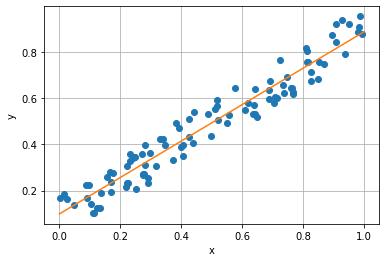

In [427]:
n = 100
r = 0.8
x = np.random.rand(n)
y = r*x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

c = np.corrcoef(x ,y)
print(c)

numerator = sum((x - sum(x)/n) * (y - sum(y)/n))
denominator = np.sqrt((sum((x - sum(x)/n) ** 2)) * (sum((y - sum(y)/n) ** 2)))
corrcoef2 = numerator / denominator
print(corrcoef2)

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
# print(a1, b1)
plt.plot([0, 1], [b1, a1 + b1])
plt.show()

In [424]:
# черновик
n = 4
r = 0.8
x = np.random.randint(0, 7, n)
y = np.random.randint(0, 7, n)
print(x)
print(sum(x)/n)
print(x - sum(x)/n)
print('*' * 60)
print(y)
print(sum(y)/n)
print(y - sum(y)/n)
print('*' * 60)
print((x - sum(x)/n) * (y - sum(y)/n))
print('*' * 60)
print(sum((x - sum(x)/n) * (y - sum(y)/n)))  # числитель
print('*' * 60)
print(sum((x - sum(x)/n) ** 2))
print(sum((y - sum(y)/n) ** 2))
print('*' * 60)
print(np.sqrt((sum((x - sum(x)/n) ** 2)) * (sum((y - sum(y)/n) ** 2))))  # знаменатель

[1 5 3 2]
2.75
[-1.75  2.25  0.25 -0.75]
************************************************************
[5 3 2 3]
3.25
[ 1.75 -0.25 -1.25 -0.25]
************************************************************
[-3.0625 -0.5625 -0.3125  0.1875]
************************************************************
-3.75
************************************************************
8.75
4.75
************************************************************
6.4468984791138135
